In [1]:
import pandas as pd
import numpy as np 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("C:/Users/Medhansh Jindal/OneDrive/Desktop/Python files/Crime_Data_from_2020_to_Present.csv")

In [4]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


Our aim is to determine if any particular group was targetted in these crimes reported in the last four years 

In [5]:
df.shape

(955339, 28)

In [6]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [7]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           136675
Vict Age               0
Vict Sex          130045
Vict Descent      130055
Premis Cd             12
Premis Desc          569
Weapon Used Cd    630320
Weapon Desc       630320
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          886873
Crm Cd 3          953045
Crm Cd 4          955275
LOCATION               0
Cross Street      806439
LAT                    0
LON                    0
dtype: int64

#### Some Column names: 

Date Reported,

Date of Occurance,

Time of Occurance,

Disctrict Reported,

Crime Code,

Crime Code Description,

Weapon used Description,

Victim Age,

Victim Sex,

Victim Descent

In [8]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [10]:
df.dropna(subset=['Mocodes'], inplace=True)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


In [11]:
df.dropna(subset=['Vict Descent', 'Vict Sex', 'Premis Desc'], inplace=True)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


#### As we can see that the Crm Cd 2,3,4 and the Cross Street columns have excessive NaN values, hence it is preferable to drop them. 


In [11]:
df.drop(['Crm Cd 2','Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis = 1, inplace=True)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,101.0,STREET,207.0,OTHER KNIFE,IC,Invest Cont,230.0,8700 LANKERSHIM BL,34.2271,-118.3878
955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,420.0,22700 NAPA ST,34.2260,-118.6214
955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,124.0,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,HOBART BL,34.0690,-118.3054
955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,503.0,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,745.0,1300 W SUNSET BL,34.0685,-118.2460


In [12]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age               0
Vict Sex             210
Vict Descent         216
Premis Cd              0
Premis Desc          555
Weapon Used Cd    494301
Weapon Desc       494301
Status                 0
Status Desc            0
Crm Cd 1              11
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [13]:
df.dropna(subset=['Crm Cd 1'], inplace = True)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,101.0,STREET,207.0,OTHER KNIFE,IC,Invest Cont,230.0,8700 LANKERSHIM BL,34.2271,-118.3878
955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,420.0,22700 NAPA ST,34.2260,-118.6214
955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,124.0,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,HOBART BL,34.0690,-118.3054
955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,503.0,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,745.0,1300 W SUNSET BL,34.0685,-118.2460


In [14]:
df['Weapon Desc']

1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
5                                                    NaN
                               ...                      
955334                                       OTHER KNIFE
955335                                               NaN
955336    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
955337                       UNKNOWN WEAPON/OTHER WEAPON
955338                                             STICK
Name: Weapon Desc, Length: 818653, dtype: object

In [15]:
X4 = df['Weapon Desc']
Scaler = LabelEncoder()
Scaler.fit(X4)
weapon = Scaler.transform(X4)

In [16]:
weapon

array([79, 79, 79, ..., 65, 75, 63])

#### We see that NaN has been encoded to 79. However we donot want to have a Null value in this particular Series hence we replace the no. 79 with mode of the data which indicates that we are replacing Null values with the maximum used weapon..

In [17]:
weapon = pd.Series(weapon)

In [18]:
y_new = weapon[weapon != 79]

In [19]:
y_new

8         65
10        65
11        65
16        77
19        65
          ..
818643    50
818648    44
818650    65
818651    75
818652    63
Length: 324360, dtype: int32

In [20]:
weapon.replace(79, y_new.median(), inplace=True)

In [21]:
weapon

0         65
1         65
2         65
3         65
4         65
          ..
818648    44
818649    65
818650    65
818651    75
818652    63
Length: 818653, dtype: int32

In [22]:
df.reset_index()

,index,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
1,2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
2,3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,...,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
3,4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,...,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277
4,5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,...,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818648,955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,...,101.0,STREET,207.0,OTHER KNIFE,IC,Invest Cont,230.0,8700 LANKERSHIM BL,34.2271,-118.3878
818649,955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,...,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,420.0,22700 NAPA ST,34.2260,-118.6214
818650,955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,...,124.0,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,HOBART BL,34.0690,-118.3054
818651,955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,...,503.0,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,745.0,1300 W SUNSET BL,34.0685,-118.2460


In [23]:
df.reset_index(inplace=True)

In [24]:
df.drop('index', axis=1, inplace=True)

In [25]:
df.drop(['Weapon Desc'], axis=1, inplace=True)

In [26]:
df['Weapon Desc'] = weapon

In [27]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Desc
0,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628,65
1,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002,65
2,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.0,CLOTHING STORE,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387,65
3,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,102.0,SIDEWALK,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277,65
4,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,501.0,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,354.0,9900 COMPTON AV,33.9467,-118.2463,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818648,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,101.0,STREET,207.0,IC,Invest Cont,230.0,8700 LANKERSHIM BL,34.2271,-118.3878,44
818649,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,104.0,DRIVEWAY,NaN,IC,Invest Cont,420.0,22700 NAPA ST,34.2260,-118.6214,65
818650,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,124.0,BUS STOP,400.0,IC,Invest Cont,624.0,HOBART BL,34.0690,-118.3054,65
818651,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,503.0,HOTEL,500.0,IC,Invest Cont,745.0,1300 W SUNSET BL,34.0685,-118.2460,75


In [28]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age               0
Vict Sex             209
Vict Descent         215
Premis Cd              0
Premis Desc          555
Weapon Used Cd    494293
Status                 0
Status Desc            0
Crm Cd 1               0
LOCATION               0
LAT                    0
LON                    0
Weapon Desc            0
dtype: int64

In [29]:
df['Weapon Used Cd'].fillna(df['Weapon Used Cd'].median(), inplace= True)

In [30]:
df.isnull().sum()

DR_NO               0
Date Rptd           0
DATE OCC            0
TIME OCC            0
AREA                0
AREA NAME           0
Rpt Dist No         0
Part 1-2            0
Crm Cd              0
Crm Cd Desc         0
Mocodes             0
Vict Age            0
Vict Sex          209
Vict Descent      215
Premis Cd           0
Premis Desc       555
Weapon Used Cd      0
Status              0
Status Desc         0
Crm Cd 1            0
LOCATION            0
LAT                 0
LON                 0
Weapon Desc         0
dtype: int64

In [31]:
df.dropna(subset=['Vict Sex', 'Vict Descent', 'Premis Desc'], inplace = True)


In [32]:
Copied = df.copy()

In [33]:
X2 = df['Status Desc']
Scaler = LabelEncoder()
Scaler.fit(X2)
y2 = Scaler.transform(X2)

X3 = df['Status']
Scaler.fit(X3)
y3 = Scaler.transform(X3)

X5 = df['Premis Desc']
Scaler.fit(X5)
y5 = Scaler.transform(X5)


X6 = df['AREA NAME']
Scaler.fit(X6)
y6 = Scaler.transform(X6)


X7 = df['Crm Cd Desc']
Scaler.fit(X7)
y7 = Scaler.transform(X7)


X8 = df['Mocodes']
Scaler.fit(X8)
y8 = Scaler.transform(X8)


X9 = df['Vict Sex']
Scaler.fit(X9)
y9 = Scaler.transform(X9)


X10 = df['Vict Descent']
Scaler.fit(X10)
y10 = Scaler.transform(X10)

In [34]:
df.drop(['Status Desc', 'Vict Descent','Vict Sex','Crm Cd Desc','AREA NAME','Premis Desc','Status'], axis=1, inplace=True)

In [35]:
df['Status Desc'] = y10
df['Vict Descent'] = y9
df['Vict Sex'] = y8
df['Crm Cd Desc'] = y7  
df['AREA NAME'] = y6
df['Premis Desc'] = y5
df['Status'] = y3






In [36]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Mocodes,Vict Age,...,LAT,LON,Weapon Desc,Status Desc,Vict Descent,Vict Sex,Crm Cd Desc,AREA NAME,Premis Desc,Status
0,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,182,1,330,1822 1402 0344,47,...,34.0444,-118.2628,65,12,3,266295,20,1,29,3
1,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,356,1,480,0344 1251,19,...,34.0210,-118.3002,65,18,4,48363,11,15,207,3
2,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,964,1,343,0325 1501,19,...,34.1576,-118.4387,65,12,3,15310,104,17,40,3
3,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,666,2,354,1822 1501 0930 2004,28,...,34.0944,-118.3277,65,7,3,267808,114,6,254,3
4,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,1826,2,354,1822 0100 0930 0929,41,...,33.9467,-118.2463,65,7,3,232784,114,14,255,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818648,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,1673,1,230,0400 1822 1310 0416,36,...,34.2271,-118.3878,44,7,3,79336,2,3,266,3
818649,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,2103,1,420,0385,44,...,34.2260,-118.6214,65,12,1,67679,112,16,63,3
818650,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,2013,2,624,2047 0400 0429 0444 1202 1822,80,...,34.0690,-118.3054,65,12,1,305564,4,11,28,3
818651,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,101,2,745,0329 0400 0416,0,...,34.0685,-118.2460,75,18,4,18383,130,1,97,3


In [37]:
X11 = df['LOCATION']
Scaler.fit(X11)
y11 = Scaler.transform(X11)

In [38]:
df.drop(['Status Desc'], axis=1, inplace=True)

In [39]:
df['Status Desc'] = y10
df['LOCATION'] = y11

In [40]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Mocodes,Vict Age,...,LAT,LON,Weapon Desc,Vict Descent,Vict Sex,Crm Cd Desc,AREA NAME,Premis Desc,Status,Status Desc
0,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,182,1,330,1822 1402 0344,47,...,34.0444,-118.2628,65,3,266295,20,1,29,3,12
1,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,356,1,480,0344 1251,19,...,34.0210,-118.3002,65,4,48363,11,15,207,3,18
2,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,964,1,343,0325 1501,19,...,34.1576,-118.4387,65,3,15310,104,17,40,3,12
3,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,666,2,354,1822 1501 0930 2004,28,...,34.0944,-118.3277,65,3,267808,114,6,254,3,7
4,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,1826,2,354,1822 0100 0930 0929,41,...,33.9467,-118.2463,65,3,232784,114,14,255,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818648,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,1673,1,230,0400 1822 1310 0416,36,...,34.2271,-118.3878,44,3,79336,2,3,266,3,7
818649,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,2103,1,420,0385,44,...,34.2260,-118.6214,65,1,67679,112,16,63,3,12
818650,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,2013,2,624,2047 0400 0429 0444 1202 1822,80,...,34.0690,-118.3054,65,1,305564,4,11,28,3,12
818651,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,101,2,745,0329 0400 0416,0,...,34.0685,-118.2460,75,4,18383,130,1,97,3,18


In [44]:
X = np.array(df.drop(['DATE OCC','Date Rptd', 'Mocodes'], axis=1))
pca = PCA(n_components = 10)
pca.fit(X)
X_pca = pca.transform(X)

In [63]:
df.dtypes

DR_NO               int64
TIME OCC            int64
AREA                int64
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Vict Age            int64
Premis Cd         float64
Weapon Used Cd    float64
Crm Cd 1          float64
LOCATION            int32
LAT               float64
LON               float64
Weapon Desc         int32
Vict Descent        int32
Vict Sex            int32
Crm Cd Desc         int32
AREA NAME           int32
Premis Desc         int32
Status              int32
Status Desc         int32
dtype: object

In [50]:
news = pd.DataFrame(df.drop(['DATE OCC','Date Rptd', 'Mocodes'], axis=1))

In [53]:
# Get the loadings for PC1 (first row)
pc1_loadings = loadings.iloc[0]

# Sort the loadings by absolute value to see the most important features
top_features_pc1 = pc1_loadings.abs().sort_values(ascending=False)
print(top_features_pc1)


DR_NO             1.000000e+00
Vict Sex          9.136745e-05
LOCATION          3.374437e-05
Rpt Dist No       2.190255e-06
Premis Cd         8.469718e-07
Crm Cd            3.874526e-07
Crm Cd 1          3.855314e-07
TIME OCC          3.771223e-07
Premis Desc       1.638834e-07
Crm Cd Desc       1.528631e-07
Weapon Used Cd    1.274748e-07
Vict Age          5.172987e-08
LON               2.226234e-08
AREA              2.180251e-08
Weapon Desc       1.764264e-08
Status Desc       1.201571e-08
LAT               6.621675e-09
Status            5.972194e-09
AREA NAME         3.556970e-09
Vict Descent      1.775644e-09
Part 1-2          5.179110e-10
Name: 0, dtype: float64


We get the top 10 columns from here

In [ ]:
New = Copied[['DR_NO','Vict Sex', 'LOCATION', 'Rpt Dist No', 'Premis Cd','Crm Cd',     'Crm Cd 1',         'TIME OCC',          'Premis Desc',      'Crm Cd Desc']]       


In [57]:
New

,DR_NO,Vict Sex,LOCATION,Rpt Dist No,Premis Cd,Crm Cd,Crm Cd 1,TIME OCC,Premis Desc,Crm Cd Desc
0,200106753,M,1000 S FLOWER ST,182,128.0,330,330.0,1800,BUS STOP/LAYOVER (ALSO QUERY 124),BURGLARY FROM VEHICLE
1,200320258,X,1400 W 37TH ST,356,502.0,480,480.0,1700,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BIKE - STOLEN
2,200907217,M,14000 RIVERSIDE DR,964,405.0,343,343.0,2037,CLOTHING STORE,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
3,220614831,M,1900 TRANSIENT,666,102.0,354,354.0,1200,SIDEWALK,THEFT OF IDENTITY
4,231808869,M,9900 COMPTON AV,1826,501.0,354,354.0,2300,SINGLE FAMILY DWELLING,THEFT OF IDENTITY
...,...,...,...,...,...,...,...,...,...,...
818648,241604405,M,8700 LANKERSHIM BL,1673,101.0,230,230.0,720,STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
818649,242106032,F,22700 NAPA ST,2103,104.0,420,420.0,2330,DRIVEWAY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
818650,242004546,F,HOBART BL,2013,124.0,624,624.0,1510,BUS STOP,BATTERY - SIMPLE ASSAULT
818651,240104953,X,1300 W SUNSET BL,101,503.0,745,745.0,100,HOTEL,VANDALISM - MISDEAMEANOR ($399 OR UNDER)


Encoding the object data..

In [87]:
New['Vict Sex'].unique()

array(['M', 'X', 'F', 'H', '-'], dtype=object)

We need to drop the rows having '-', and 'H' as Vict Sex

In [92]:
New.drop(New[(New['Vict Sex'] == 'H') | (New['Vict Sex'] == '-')].index, inplace=True)

C:\Users\Medhansh Jindal\AppData\Local\Temp\ipykernel_13680\1897326515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New.drop(New[(New['Vict Sex'] == 'H') | (New['Vict Sex'] == '-')].index, inplace=True)


In [93]:
New

,DR_NO,Vict Sex,LOCATION,Rpt Dist No,Premis Cd,Crm Cd,Crm Cd 1,TIME OCC,Premis Desc,Crm Cd Desc
0,200106753,M,1000 S FLOWER ST,182,128.0,330,330.0,1800,BUS STOP/LAYOVER (ALSO QUERY 124),BURGLARY FROM VEHICLE
1,200320258,X,1400 W 37TH ST,356,502.0,480,480.0,1700,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BIKE - STOLEN
2,200907217,M,14000 RIVERSIDE DR,964,405.0,343,343.0,2037,CLOTHING STORE,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
3,220614831,M,1900 TRANSIENT,666,102.0,354,354.0,1200,SIDEWALK,THEFT OF IDENTITY
4,231808869,M,9900 COMPTON AV,1826,501.0,354,354.0,2300,SINGLE FAMILY DWELLING,THEFT OF IDENTITY
...,...,...,...,...,...,...,...,...,...,...
818648,241604405,M,8700 LANKERSHIM BL,1673,101.0,230,230.0,720,STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
818649,242106032,F,22700 NAPA ST,2103,104.0,420,420.0,2330,DRIVEWAY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
818650,242004546,F,HOBART BL,2013,124.0,624,624.0,1510,BUS STOP,BATTERY - SIMPLE ASSAULT
818651,240104953,X,1300 W SUNSET BL,101,503.0,745,745.0,100,HOTEL,VANDALISM - MISDEAMEANOR ($399 OR UNDER)


In [94]:
Vict_sex = LabelEncoder().fit_transform(New['Vict Sex'])

In [95]:
Vict_sex

array([1, 2, 1, ..., 0, 2, 0])

Let us add the date on which the incident occured and the date it was reported..

In [97]:
Date = df[['DR_NO','Date Rptd', 'DATE OCC']]

In [98]:
Date

,DR_NO,Date Rptd,DATE OCC
0,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM
1,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM
2,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM
3,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM
4,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM
...,...,...,...
818648,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM
818649,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM
818650,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM
818651,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM


In [99]:
Date.dtypes

DR_NO         int64
Date Rptd    object
DATE OCC     object
dtype: object

Converting to Date time format

In [100]:
Date['Date Rptd'] = pd.to_datetime(Date['Date Rptd'])
Date['DATE OCC'] = pd.to_datetime(Date['DATE OCC'])


C:\Users\Medhansh Jindal\AppData\Local\Temp\ipykernel_13680\3516393797.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Date['Date Rptd'] = pd.to_datetime(Date['Date Rptd'])
C:\Users\Medhansh Jindal\AppData\Local\Temp\ipykernel_13680\3516393797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date['Date Rptd'] = pd.to_datetime(Date['Date Rptd'])
C:\Users\Medhansh Jindal\AppData\Local\Temp\ipykernel_13680\3516393797.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
 

In [101]:
Date

,DR_NO,Date Rptd,DATE OCC
0,200106753,2020-02-09,2020-02-08
1,200320258,2020-11-11,2020-11-04
2,200907217,2023-05-10,2020-03-10
3,220614831,2022-08-18,2020-08-17
4,231808869,2023-04-04,2020-12-01
...,...,...,...
818648,241604405,2024-01-14,2024-01-13
818649,242106032,2024-02-20,2024-02-17
818650,242004546,2024-01-16,2024-01-16
818651,240104953,2024-01-15,2024-01-15


In [104]:
Date['Year Reported'] = Date['Date Rptd'].dt.year

C:\Users\Medhansh Jindal\AppData\Local\Temp\ipykernel_13680\306399672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date['Year Reported'] = Date['Date Rptd'].dt.year


In [105]:
Date

,DR_NO,Date Rptd,DATE OCC,Year Reported
0,200106753,2020-02-09,2020-02-08,2020
1,200320258,2020-11-11,2020-11-04,2020
2,200907217,2023-05-10,2020-03-10,2023
3,220614831,2022-08-18,2020-08-17,2022
4,231808869,2023-04-04,2020-12-01,2023
...,...,...,...,...
818648,241604405,2024-01-14,2024-01-13,2024
818649,242106032,2024-02-20,2024-02-17,2024
818650,242004546,2024-01-16,2024-01-16,2024
818651,240104953,2024-01-15,2024-01-15,2024


In [237]:
Crime = New.merge(Date, on='DR_NO', how='inner')

In [238]:
Crime

,DR_NO,Vict Sex,LOCATION,Rpt Dist No,Premis Cd,Crm Cd,Crm Cd 1,TIME OCC,Premis Desc,Crm Cd Desc,Date Rptd,DATE OCC,Year Reported
0,200106753,M,1000 S FLOWER ST,182,128.0,330,330.0,1800,BUS STOP/LAYOVER (ALSO QUERY 124),BURGLARY FROM VEHICLE,2020-02-09,2020-02-08,2020
1,200320258,X,1400 W 37TH ST,356,502.0,480,480.0,1700,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BIKE - STOLEN,2020-11-11,2020-11-04,2020
2,200907217,M,14000 RIVERSIDE DR,964,405.0,343,343.0,2037,CLOTHING STORE,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023-05-10,2020-03-10,2023
3,220614831,M,1900 TRANSIENT,666,102.0,354,354.0,1200,SIDEWALK,THEFT OF IDENTITY,2022-08-18,2020-08-17,2022
4,231808869,M,9900 COMPTON AV,1826,501.0,354,354.0,2300,SINGLE FAMILY DWELLING,THEFT OF IDENTITY,2023-04-04,2020-12-01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817765,241604405,M,8700 LANKERSHIM BL,1673,101.0,230,230.0,720,STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2024-01-14,2024-01-13,2024
817766,242106032,F,22700 NAPA ST,2103,104.0,420,420.0,2330,DRIVEWAY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2024-02-20,2024-02-17,2024
817767,242004546,F,HOBART BL,2013,124.0,624,624.0,1510,BUS STOP,BATTERY - SIMPLE ASSAULT,2024-01-16,2024-01-16,2024
817768,240104953,X,1300 W SUNSET BL,101,503.0,745,745.0,100,HOTEL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2024-01-15,2024-01-15,2024


We observe that although Crm Cd and Crm Cd 1 are among the top 10 features however, they represent the exact same thing so we drop one of them and use Weapon Crm Cd instead..

In [123]:
Weapon = df[['DR_NO','Weapon Used Cd']]

In [239]:
Crime = Crime.merge(Weapon, on='DR_NO', how='inner')

In [240]:
Crime.drop(['Crm Cd 1'], axis=1, inplace=True)

In [241]:
Crime

,DR_NO,Vict Sex,LOCATION,Rpt Dist No,Premis Cd,Crm Cd,TIME OCC,Premis Desc,Crm Cd Desc,Date Rptd,DATE OCC,Year Reported,Weapon Used Cd
0,200106753,M,1000 S FLOWER ST,182,128.0,330,1800,BUS STOP/LAYOVER (ALSO QUERY 124),BURGLARY FROM VEHICLE,2020-02-09,2020-02-08,2020,400.0
1,200320258,X,1400 W 37TH ST,356,502.0,480,1700,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BIKE - STOLEN,2020-11-11,2020-11-04,2020,400.0
2,200907217,M,14000 RIVERSIDE DR,964,405.0,343,2037,CLOTHING STORE,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023-05-10,2020-03-10,2023,400.0
3,220614831,M,1900 TRANSIENT,666,102.0,354,1200,SIDEWALK,THEFT OF IDENTITY,2022-08-18,2020-08-17,2022,400.0
4,231808869,M,9900 COMPTON AV,1826,501.0,354,2300,SINGLE FAMILY DWELLING,THEFT OF IDENTITY,2023-04-04,2020-12-01,2023,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817765,241604405,M,8700 LANKERSHIM BL,1673,101.0,230,720,STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2024-01-14,2024-01-13,2024,207.0
817766,242106032,F,22700 NAPA ST,2103,104.0,420,2330,DRIVEWAY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2024-02-20,2024-02-17,2024,400.0
817767,242004546,F,HOBART BL,2013,124.0,624,1510,BUS STOP,BATTERY - SIMPLE ASSAULT,2024-01-16,2024-01-16,2024,400.0
817768,240104953,X,1300 W SUNSET BL,101,503.0,745,100,HOTEL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2024-01-15,2024-01-15,2024,500.0


In [242]:
Crime['Month Reported'] = Crime['Date Rptd'].dt.month_name()

In [243]:
Crime['Month Occured'] = Crime['DATE OCC'].dt.month_name()
Crime['Year Occured'] = Crime['DATE OCC'].dt.year

Crime['Date Occured'] = Crime['DATE OCC'].dt.day
Crime['Date Reported'] = Crime['Date Rptd'].dt.day

In [244]:
Crime

,DR_NO,Vict Sex,LOCATION,Rpt Dist No,Premis Cd,Crm Cd,TIME OCC,Premis Desc,Crm Cd Desc,Date Rptd,DATE OCC,Year Reported,Weapon Used Cd,Month Reported,Month Occured,Year Occured,Date Occured,Date Reported
0,200106753,M,1000 S FLOWER ST,182,128.0,330,1800,BUS STOP/LAYOVER (ALSO QUERY 124),BURGLARY FROM VEHICLE,2020-02-09,2020-02-08,2020,400.0,February,February,2020,8,9
1,200320258,X,1400 W 37TH ST,356,502.0,480,1700,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BIKE - STOLEN,2020-11-11,2020-11-04,2020,400.0,November,November,2020,4,11
2,200907217,M,14000 RIVERSIDE DR,964,405.0,343,2037,CLOTHING STORE,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023-05-10,2020-03-10,2023,400.0,May,March,2020,10,10
3,220614831,M,1900 TRANSIENT,666,102.0,354,1200,SIDEWALK,THEFT OF IDENTITY,2022-08-18,2020-08-17,2022,400.0,August,August,2020,17,18
4,231808869,M,9900 COMPTON AV,1826,501.0,354,2300,SINGLE FAMILY DWELLING,THEFT OF IDENTITY,2023-04-04,2020-12-01,2023,400.0,April,December,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817765,241604405,M,8700 LANKERSHIM BL,1673,101.0,230,720,STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2024-01-14,2024-01-13,2024,207.0,January,January,2024,13,14
817766,242106032,F,22700 NAPA ST,2103,104.0,420,2330,DRIVEWAY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2024-02-20,2024-02-17,2024,400.0,February,February,2024,17,20
817767,242004546,F,HOBART BL,2013,124.0,624,1510,BUS STOP,BATTERY - SIMPLE ASSAULT,2024-01-16,2024-01-16,2024,400.0,January,January,2024,16,16
817768,240104953,X,1300 W SUNSET BL,101,503.0,745,100,HOTEL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2024-01-15,2024-01-15,2024,500.0,January,January,2024,15,15


In [245]:
Crime.drop(['Date Rptd', 'DATE OCC'], axis=1, inplace=True)

In [246]:
Crime['Difference in Reporting (Days)'] = Crime['Date Reported'] - Crime['Date Occured']

In [247]:
Crime

,DR_NO,Vict Sex,LOCATION,Rpt Dist No,Premis Cd,Crm Cd,TIME OCC,Premis Desc,Crm Cd Desc,Year Reported,Weapon Used Cd,Month Reported,Month Occured,Year Occured,Date Occured,Date Reported,Difference in Reporting (Days)
0,200106753,M,1000 S FLOWER ST,182,128.0,330,1800,BUS STOP/LAYOVER (ALSO QUERY 124),BURGLARY FROM VEHICLE,2020,400.0,February,February,2020,8,9,1
1,200320258,X,1400 W 37TH ST,356,502.0,480,1700,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BIKE - STOLEN,2020,400.0,November,November,2020,4,11,7
2,200907217,M,14000 RIVERSIDE DR,964,405.0,343,2037,CLOTHING STORE,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023,400.0,May,March,2020,10,10,0
3,220614831,M,1900 TRANSIENT,666,102.0,354,1200,SIDEWALK,THEFT OF IDENTITY,2022,400.0,August,August,2020,17,18,1
4,231808869,M,9900 COMPTON AV,1826,501.0,354,2300,SINGLE FAMILY DWELLING,THEFT OF IDENTITY,2023,400.0,April,December,2020,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817765,241604405,M,8700 LANKERSHIM BL,1673,101.0,230,720,STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2024,207.0,January,January,2024,13,14,1
817766,242106032,F,22700 NAPA ST,2103,104.0,420,2330,DRIVEWAY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2024,400.0,February,February,2024,17,20,3
817767,242004546,F,HOBART BL,2013,124.0,624,1510,BUS STOP,BATTERY - SIMPLE ASSAULT,2024,400.0,January,January,2024,16,16,0
817768,240104953,X,1300 W SUNSET BL,101,503.0,745,100,HOTEL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2024,500.0,January,January,2024,15,15,0


#### Now we plot a graph that gives total number of crimes reported in respective year. 

<BarContainer object of 5 artists>

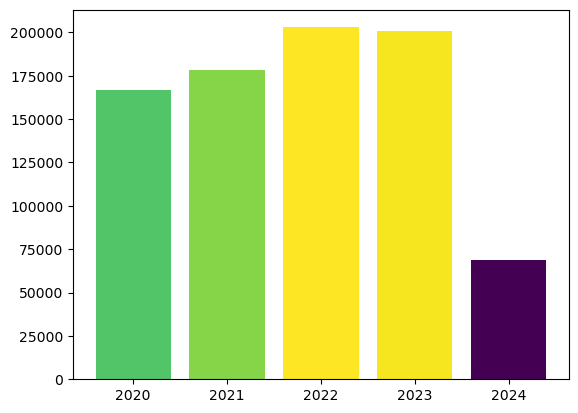

In [248]:
year_counts = Crime['Year Reported'].value_counts().sort_index()

norm = plt.Normalize(year_counts.values.min(), year_counts.values.max())

cmap = plt.cm.viridis


colors = cmap(norm(year_counts.values))

plt.bar(year_counts.index, year_counts.values, color=colors)


#### Now checking number of crimes per year victimizing a particular gender

In [249]:
grouped = Crime.groupby('Year Reported')['Vict Sex'].value_counts().unstack()



Text(0, 0.5, 'Number of cases Reported')

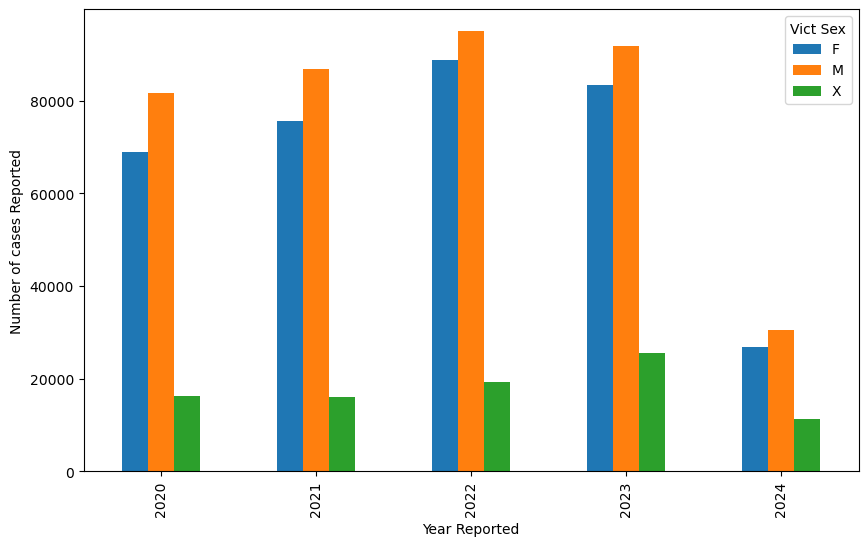

In [121]:
grouped.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.ylabel("Number of cases Reported")

In [257]:
copy_dataset = Crime.copy()

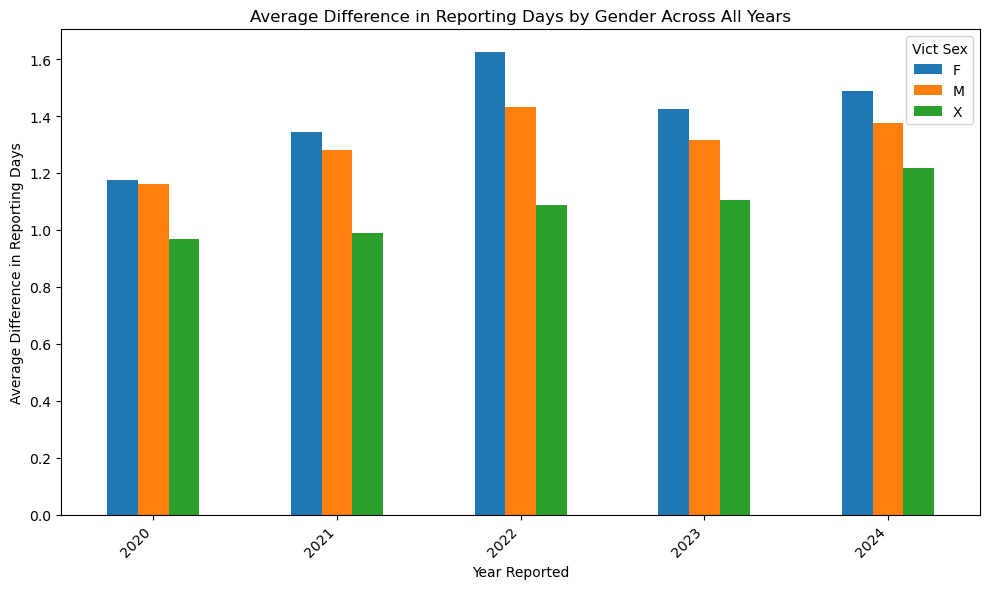

In [280]:
copy_dataset['Same Month'] = copy_dataset['Month Occured'] == copy_dataset['Month Reported']
copy_dataset['diff Month'] = copy_dataset['Month Occured'] != copy_dataset['Month Reported']
copy_dataset = copy_dataset[copy_dataset['Difference in Reporting (Days)'] >= 0]



if copy_dataset['Same Month'].any():
    Grouped = copy_dataset[copy_dataset['Same Month']].groupby(['Year Reported','Vict Sex'])['Difference in Reporting (Days)'].mean().unstack()
    Grouped.plot(kind='bar', stacked=False, ax=plt.gca(),figsize=(10, 6))
    plt.title("Reported month is same as occuring month")
    plt.title("Average Difference in Reporting Days by Gender Across All Years")
    plt.ylabel("Average Difference in Reporting Days")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout() 




In 2020, the most reported crime for 'F' was 'INTIMATE PARTNER - SIMPLE ASSAULT' with 8000 occurrences.
In 2020, the most reported crime for 'M' was 'BATTERY - SIMPLE ASSAULT' with 8376 occurrences.
In 2020, the most reported crime for 'X' was 'BURGLARY' with 2916 occurrences.
In 2021, the most reported crime for 'F' was 'INTIMATE PARTNER - SIMPLE ASSAULT' with 8182 occurrences.
In 2021, the most reported crime for 'M' was 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' with 9147 occurrences.
In 2021, the most reported crime for 'X' was 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)' with 2517 occurrences.
In 2022, the most reported crime for 'F' was 'THEFT OF IDENTITY' with 13374 occurrences.
In 2022, the most reported crime for 'M' was 'BATTERY - SIMPLE ASSAULT' with 9397 occurrences.
In 2022, the most reported crime for 'X' was 'BURGLARY' with 3288 occurrences.
In 2023, the most reported crime for 'F' was 'BATTERY - SIMPLE ASSAULT' with 8806 occurrences.
In 2023, the most

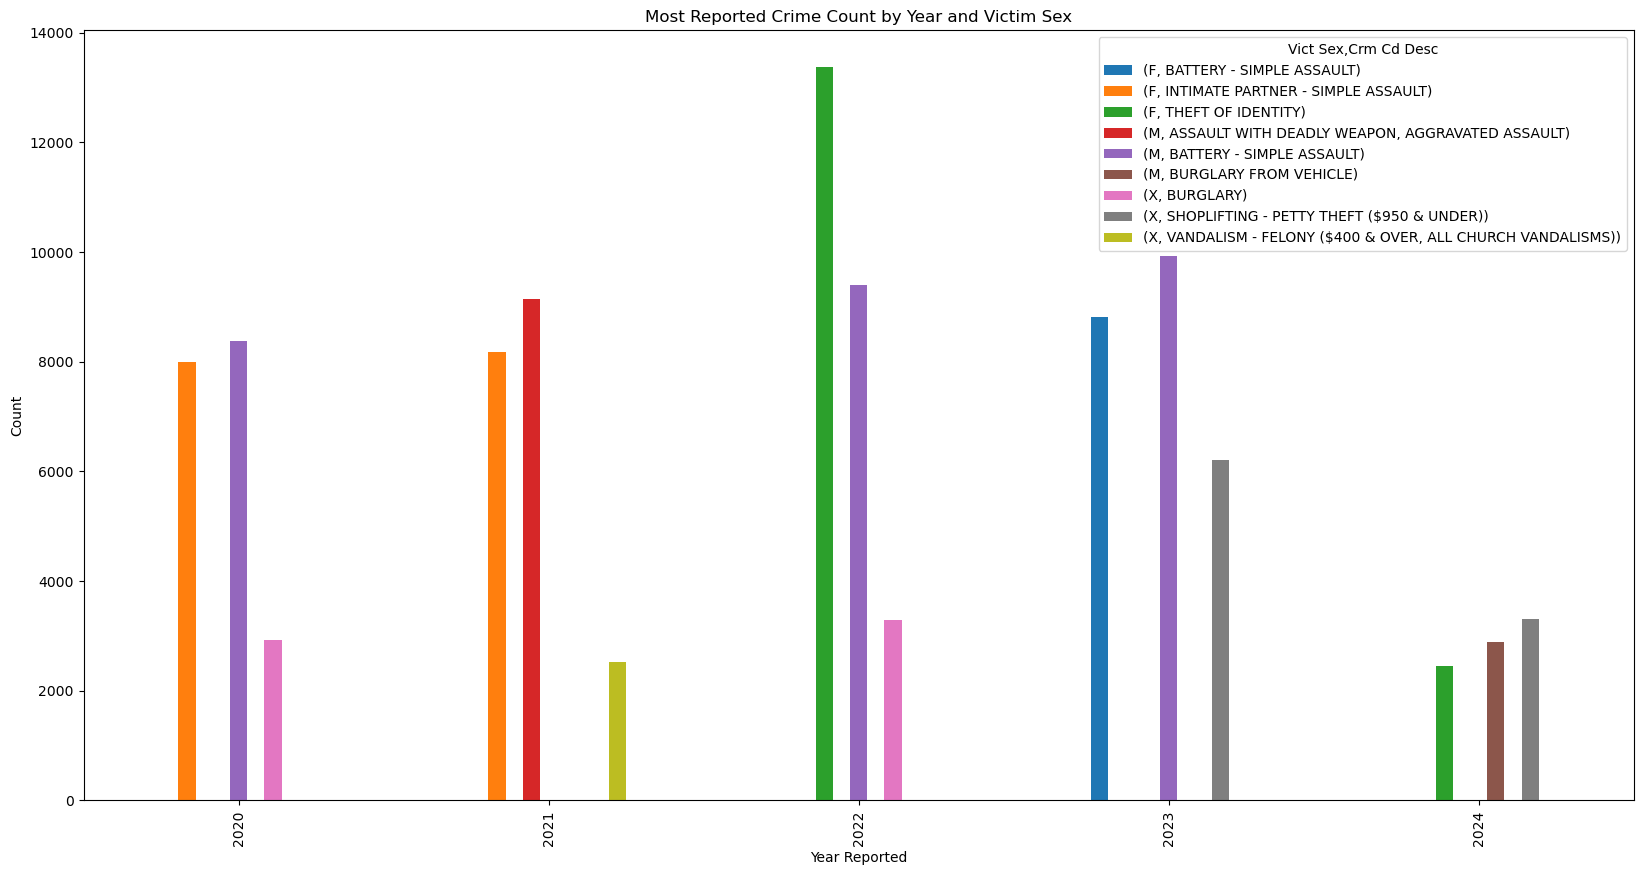

In [299]:
yearly_crime_counts = Crime.groupby(['Year Reported','Vict Sex', 'Crm Cd Desc']).size().reset_index(name='Count')

most_common_crime_per_year = yearly_crime_counts.loc[yearly_crime_counts.groupby(['Year Reported', 'Vict Sex'])['Count'].idxmax()]

pivot_df = most_common_crime_per_year.pivot_table(index='Year Reported', columns=['Vict Sex', 'Crm Cd Desc'], values='Count', fill_value=0)
plt.figure(figsize=(20, 10))

pivot_df.plot(kind='bar', stacked=False, ax=plt.gca())

plt.title("Most Reported Crime Count by Year and Victim Sex")
plt.ylabel("Count")
plt.xlabel("Year Reported")

for index, row in most_common_crime_per_year.iterrows():
    print(f"In {row['Year Reported']}, the most reported crime for '{row['Vict Sex']}' was '{row['Crm Cd Desc']}' with {row['Count']} occurrences.")

C:\Users\Medhansh Jindal\AppData\Local\Temp\ipykernel_13680\695964308.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gt = Crime.groupby(['Vict Sex', 'TIME_OCC_BINNED']).size().unstack(fill_value=0)


<Axes: xlabel='TIME_OCC_BINNED', ylabel='Vict Sex'>

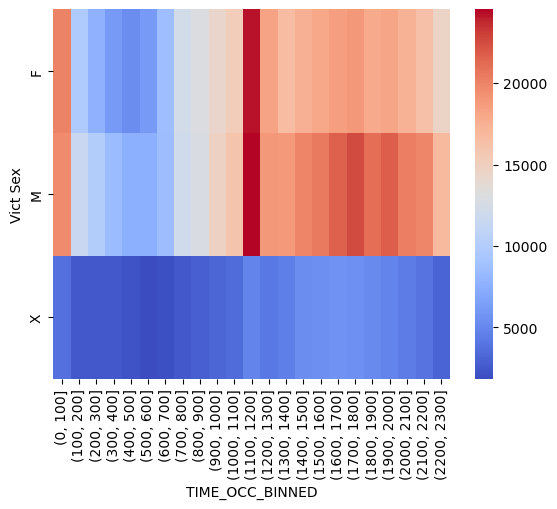

In [250]:
Crime['TIME_OCC_BINNED'] = pd.cut(Crime['TIME OCC'], bins=np.arange(0, 2400, 100))
gt = Crime.groupby(['Vict Sex', 'TIME_OCC_BINNED']).size().unstack(fill_value=0)
sns.heatmap(gt, cmap="coolwarm", annot=False)


In [251]:
Crime

,DR_NO,Vict Sex,LOCATION,Rpt Dist No,Premis Cd,Crm Cd,TIME OCC,Premis Desc,Crm Cd Desc,Year Reported,Weapon Used Cd,Month Reported,Month Occured,Year Occured,Date Occured,Date Reported,Difference in Reporting (Days),TIME_OCC_BINNED
0,200106753,M,1000 S FLOWER ST,182,128.0,330,1800,BUS STOP/LAYOVER (ALSO QUERY 124),BURGLARY FROM VEHICLE,2020,400.0,February,February,2020,8,9,1,"(1700.0, 1800.0]"
1,200320258,X,1400 W 37TH ST,356,502.0,480,1700,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",BIKE - STOLEN,2020,400.0,November,November,2020,4,11,7,"(1600.0, 1700.0]"
2,200907217,M,14000 RIVERSIDE DR,964,405.0,343,2037,CLOTHING STORE,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),2023,400.0,May,March,2020,10,10,0,"(2000.0, 2100.0]"
3,220614831,M,1900 TRANSIENT,666,102.0,354,1200,SIDEWALK,THEFT OF IDENTITY,2022,400.0,August,August,2020,17,18,1,"(1100.0, 1200.0]"
4,231808869,M,9900 COMPTON AV,1826,501.0,354,2300,SINGLE FAMILY DWELLING,THEFT OF IDENTITY,2023,400.0,April,December,2020,1,4,3,"(2200.0, 2300.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817765,241604405,M,8700 LANKERSHIM BL,1673,101.0,230,720,STREET,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",2024,207.0,January,January,2024,13,14,1,"(700.0, 800.0]"
817766,242106032,F,22700 NAPA ST,2103,104.0,420,2330,DRIVEWAY,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),2024,400.0,February,February,2024,17,20,3,NaN
817767,242004546,F,HOBART BL,2013,124.0,624,1510,BUS STOP,BATTERY - SIMPLE ASSAULT,2024,400.0,January,January,2024,16,16,0,"(1500.0, 1600.0]"
817768,240104953,X,1300 W SUNSET BL,101,503.0,745,100,HOTEL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2024,500.0,January,January,2024,15,15,0,"(0.0, 100.0]"


#### We note that the dataset is quite large to efficiently perform an analysis, hence we create a sample to perform the analysis and generalize it to the whole dataset

In [252]:
sample_df = Crime.sample(frac=0.00125, random_state=42)  


#### Performing ANOVA test..

In [253]:
a = sample_df.loc[sample_df['Vict Sex'] == 'M', 'TIME OCC'].to_numpy()
b = sample_df.loc[sample_df['Vict Sex'] == 'F', 'TIME OCC'].to_numpy()
c = sample_df.loc[sample_df['Vict Sex'] == 'X', 'TIME OCC'].to_numpy()
fvalue, pvalue = st.f_oneway(a,b,c)
print(fvalue, pvalue)

3.189501416543134 0.04160397148320962


#### We see that pvalue is less than 0.05 (ie 5%) so we reject the null hypothesis, ie the average time at which the crime occured is different for different genders is due to some reason

Let us now see if a particular crime has any relation with the victim's gender

In [205]:
d = sample_df.loc[sample_df['Vict Sex'] == 'M', 'Crm Cd'].to_numpy()
e = sample_df.loc[sample_df['Vict Sex'] == 'F', 'Crm Cd'].to_numpy()
f = sample_df.loc[sample_df['Vict Sex'] == 'X', 'Crm Cd'].to_numpy()
fvalue, pvalue = st.f_oneway(d,e,f)
print(fvalue, pvalue)

6.924384776834102 0.0010304561603237078


In [206]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(sample_df['Vict Sex'], sample_df['Crm Cd Desc'])

# Apply the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 384.16833848869993
P-value: 6.686515266850436e-28


#### We observe that the crime description has a relation with victim's gender as in both Chi square and ANOVA test, pvalue is less than 0.05(5%). Hence we may conclude that a particular crime occured at a particular time and victimsed a specific gender. Any occurance was not by chance. 

C:\Users\Medhansh Jindal\AppData\Local\Temp\ipykernel_13680\583153960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gt = Crime.groupby(['Year Occured', 'TIME_OCC_BINNED']).size().unstack(fill_value=0)


<Axes: xlabel='TIME_OCC_BINNED', ylabel='Year Occured'>

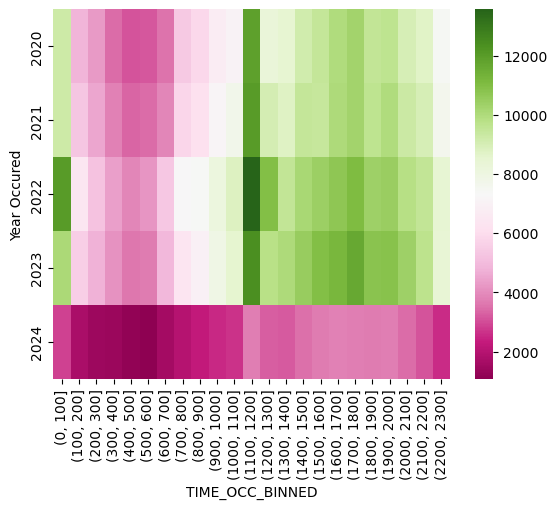

In [254]:
Crime['TIME_OCC_BINNED'] = pd.cut(Crime['TIME OCC'], bins=np.arange(0, 2400, 100))
gt = Crime.groupby(['Year Occured', 'TIME_OCC_BINNED']).size().unstack(fill_value=0)
sns.heatmap(gt, cmap="PiYG", annot=False)

#### By comparing the two heatmaps we notice that more than 12000 crimes occured in 2022 between 11 am - 12 pm and targetted gender was the male population. 

#### Also, from the second heatmap we observe that majority of the crimes occured in the evening ie from 3 - 6 pm

#### Checking the correlation between all numerical the features..

<Axes: >

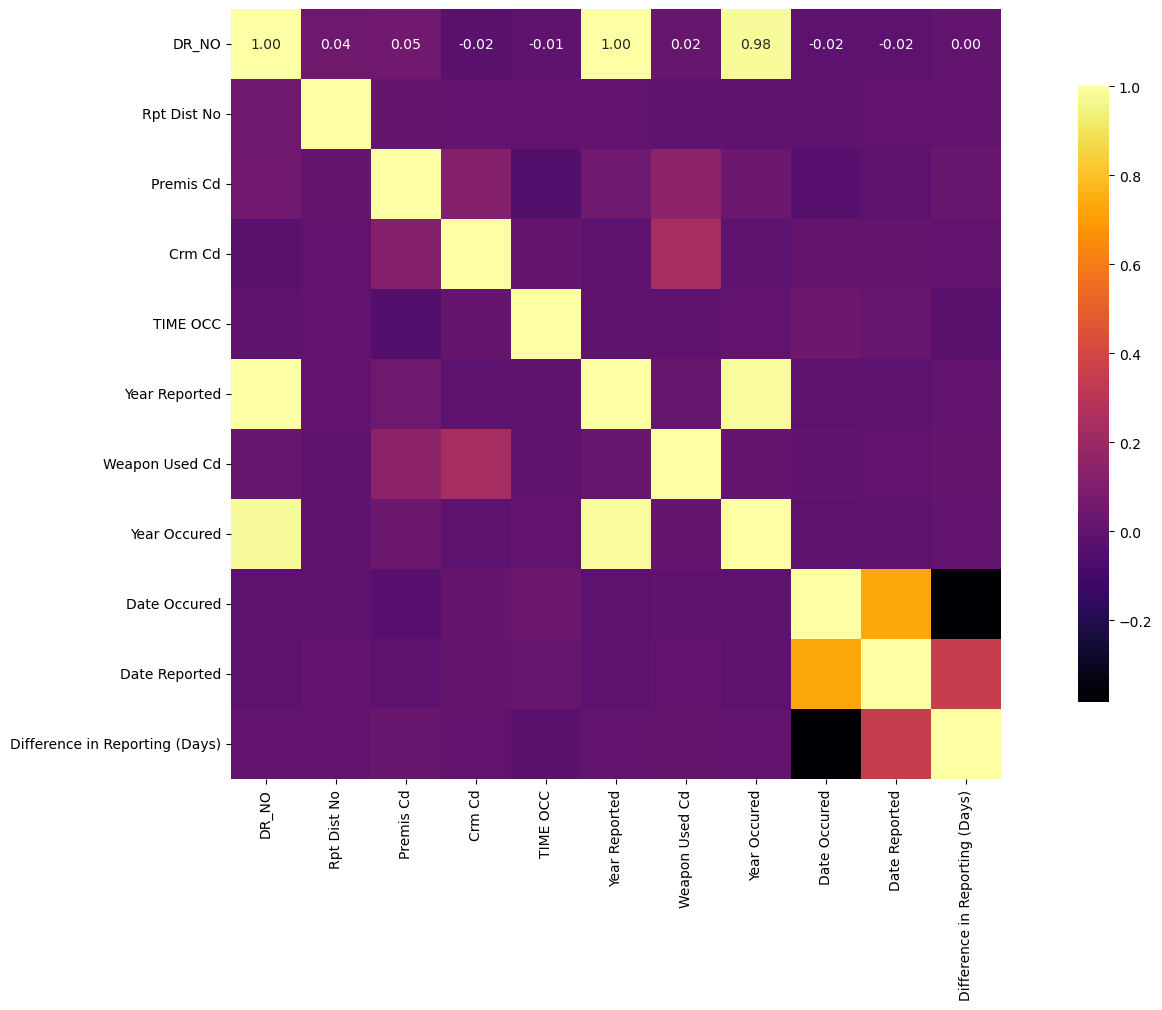

In [300]:
num_cols = Crime.select_dtypes(include=['number']).columns

correlation_matrix = Crime[num_cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(
    correlation_matrix,
    annot=True,               
    fmt=".2f",                
    cmap='inferno',          
    square=True,
    cbar_kws={"shrink": .8}
)



### CONLUSION

#### General Analysis

Across all the years for which we have analyzed the data, majority of the crimes have victimized the male population. This could be due to more population of males in the areaa of study or more number of cases reported by males as compared to females and Non-binary individuals due factors stated subsequently. 

The total number of reported cases increases from 2020 to 2022, with 2022 seeing the highest number of cases.

Females('F'): The most reported crime is typically related to "Intimate Partner - Simple Assault" in 2020 and 2021. In 2022, "Theft of Identity" becomes the most reported crime.

Males ('M'): Battery - Simple Assault" is the most common crime reported by males across multiple years, with a shift towards property crimes (e.g., burglary) in some years.

Non-binary ('X'): Vandalism, burglary, and petty theft are common crimes reported by 'X', indicating property-related crimes are prevalent.

Analysis shows significant differences in crime occurrence times between genders. For example, males tend to be involved in crimes occurring between 11 am and 12 pm, particularly in 2022, while crimes against non-binary individuals are distributed more evenly throughout the day.
A peak in crimes between 3 pm to 6 pm suggests that most incidents tend to occur in the late afternoon or evening.

Crimes in the late afternoon and evening are more likely to affect people of all genders, as these are times when families and individuals are outside, shopping, or socializing.

The statistical association between gender and crime type suggests that certain crimes disproportionately affect specific genders. This could result from gender-based vulnerabilities (e.g., intimate partner violence toward females, physical assaults involving males) or societal attitudes toward different gender identities.

The significant results may also indicate systemic factors such as law enforcement biases, societal expectations, or differential access to resources (e.g., safe housing, self-defense) that make certain genders more prone to specific types of crime.

There is a noticeable drop in the number of reported cases in 2024, which might indicate fewer incidents reported or a potential data collection limitation for that year.

#### Crime Data Analysis for Females

The high frequency of intimate partner violence against females is a well-documented phenomenon worldwide, driven by various factors such as power dynamics, financial dependence, and societal tolerance for domestic violence in certain areas.

However, in 2022 the number of cases reported by Female victims for 'THEFT OF IDENTITY' comprised almost 20% of the total cases reported by them. This could be due to the fact that post the Pandemic (COVID-19) Women, like other demographics, are increasingly engaging in online shopping, social media, and digital communication, making them more susceptible to phishing scams, social engineering, and data breaches. Women, especially those who might not be as tech-savvy, may be more vulnerable to targeted identity theft schemes. Scammers often design scams targeting women specifically, such as those involving fake job offers, romance scams, or fraudulent online retail schemes. These scams often require sensitive personal information, which can then be used for identity theft.  

From the graph, we observed a dealy in average reporting time by women as copared to other genders. Women may experience delays in reporting crimes, particularly domestic or intimate partner violence, due to fear of retaliation, shame, or lack of support. This may explain the slightly higher average reporting time for females.

#### Crime Data Analysis for Males

Males, on the other hand, may be more likely to report crimes like physical assaults or confrontations immediately, especially if it involves disputes in public spaces or workplaces leading to a lower average time in dealy for reporting crimes.
Males may be more prone to experience assaults and property-related crimes (e.g., burglaries) due to their increased likelihood of being in environments where these types of crimes happen, such as workplaces, public areas, or risky neighborhoods.

The peak of crimes affecting males between 11 am and 12 pm in 2022 could be due to their work or public presence during that time. Male-dominated jobs in high-risk sectors (construction, transport) might explain the higher crime frequency. The sharp increase in crimes affecting males between 11 am and 12 pm could suggest that many crimes are opportunistic, happening during work breaks, lunchtime, or commuting hours.

Another possible reason might be that by late morning, fatigue or stress may build up, particularly in demanding jobs or high-stress environments. Males working in these settings may experience heightened irritability or frustration, leading to disputes or physical altercations with coworkers, supervisors, or the public.
The late morning period often sees heavy traffic as people commute to late-starting shifts or run errands. Road rage incidents or public transport altercations are common around midday when the roads are still relatively busy. Males may be more likely to engage in physical altercations during these tense commuting periods.The stress of driving or delays in public transport could contribute to more aggressive behavior, leading to confrontations between drivers or passengers that escalate into physical violence.

#### Crime Data Analysis for Non-Binary Individuals

Non-binary or gender-nonconforming individuals may face greater societal discrimination, fear of not being taken seriously, or distrust in the justice system, leading to underreporting of crimes.

There may be fewer non-binary individuals in the dataset, either due to population size or incomplete data collection related to gender identity.

The pattern of non-binary individuals experiencing property crimes such as burglary or vandalism could suggest potential targeting based on gender identity, where perpetrators may see them as vulnerable or marginalized.